# Sandbox

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import anndata as ad
import scanpy as sc

import warnings

warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)  # only tells me about my GPUs

In [2]:

adata = ad.read_h5ad("/Users/tim.treis/Documents/GitHub/jumpcp/data/jump_target2_spherized.h5ad")
adata

/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 64464 × 558
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'Metadata_WellType', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration', 'Metadata_Excitation_Low_DNA', 'Metadata_Excitation_Low_ER', 'Metadata_Excitation_Low_RNA', 'Metadata_Excitation_Low_AGP', 'Metadata_Excitation_Low_Mito', 'Metadata_Excitation_High_DNA', 'Metadata_Excitation_High_ER', 'Metadata_Excitation_High_RNA', 'Metadata_Excitation_High_AGP', 'Metadata_Excitation_High_Mito', 'Metadata_Emission_Low_DNA', 'Metadata_Emission_Low_ER', 'Metadata_Emission_Low_RNA', 'Metadata_Emission_Low_AGP', 'Metadata_Emission_Low_Mito', 'Metadata_Emission_High_DNA', 'Metadata_Emission_High_ER', 'Metadata_Emission

In [7]:
import scib
from scib.metrics import access_label_exploitation
import scvi

@access_label_exploitation
def run_scgen(adata: ad.AnnData, batch_key: str, label_key: str):
    return scib.ig.scgen(
        adata=adata, batch=batch_key, cell_type=label_key, epochs=1
    )

adata_corrected, adata_renamed_corrected = run_scgen(adata=adata, batch_key="Metadata_Source", label_key="Metadata_JCP2022")


/Users/tim.treis/Documents/GitHub/scib/scib/metrics/label_exploitation.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels = group[label_key].values
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/1: 100%|██████████| 1/1 [00:56<00:00, 56.23s/it, v_num=1, train_loss_step=6.08e+3, train_loss_epoch=9.79e+3]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:56<00:00, 56.24s/it, v_num=1, train_loss_step=6.08e+3, train_loss_epoch=9.79e+3]


/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:268: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_shared_ann = AnnData.concatenate(


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:287: ImplicitModificationWarning: Setting element `.obsm['latent']` of view, initializing view as actual.
  corrected.obsm["latent"] = all_shared_ann[corrected.obs_names,:].X
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/1: 100%|██████████| 1/1 [01:07<00:00, 67.57s/it, v_num=1, train_loss_step=2e+4, train_loss_epoch=9.71e+3]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [01:07<00:00, 67.58s/it, v_num=1, train_loss_step=2e+4, train_loss_epoch=9.71e+3]


/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:268: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_shared_ann = AnnData.concatenate(


INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/tim.treis/anaconda3/envs/scib/lib/python3.10/site-packages/scgen/_scgen.py:287: ImplicitModificationWarning: Setting element `.obsm['latent']` of view, initializing view as actual.
  corrected.obsm["latent"] = all_shared_ann[corrected.obs_names,:].X


In [ ]:
sc.pp.neighbors(adata_corrected)
sc.tl.umap(adata_corrected)

<Axes: title={'center': 'drug_to_color'}, xlabel='X_umap1', ylabel='X_umap2'>

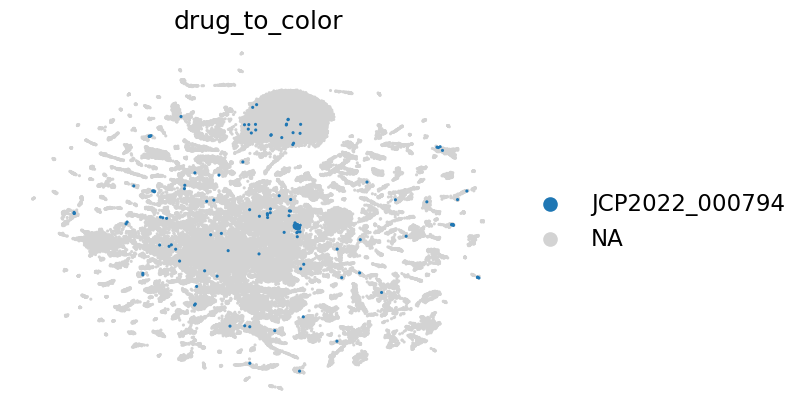

In [18]:
drugs_to_color = ["JCP2022_000794"]

adata_corrected.obs["drug_to_color"] = [
    drug if drug in drugs_to_color else "Other"
    for drug in adata_corrected.obs["Metadata_JCP2022"].values
]
sc.pl.embedding(
    adata_corrected,
    "X_umap",
    color="drug_to_color",
    groups=drugs_to_color,
    palette="tab20",
    s=20,
    frameon=False,
    show=False,
)

In [ ]:
sc.pp.neighbors(adata_renamed_corrected)
sc.tl.umap(adata_renamed_corrected)

<Axes: title={'center': 'drug_to_color'}, xlabel='X_umap1', ylabel='X_umap2'>

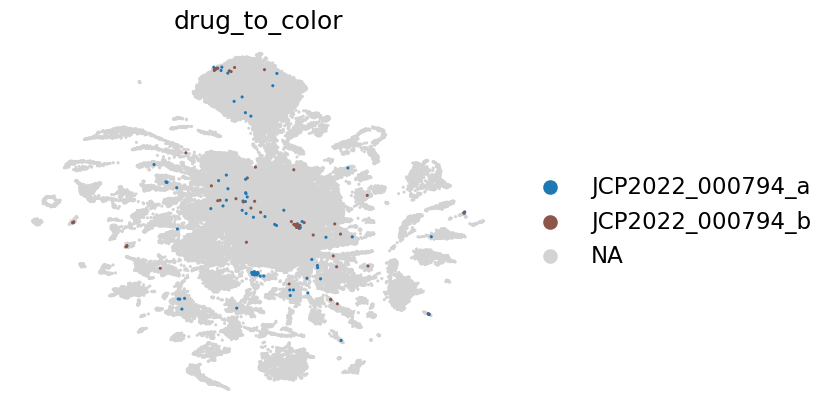

In [21]:
drugs_to_color = ["JCP2022_000794_a", "JCP2022_000794_b"]

adata_renamed_corrected.obs["drug_to_color"] = [
    drug if drug in drugs_to_color else "Other"
    for drug in adata_renamed_corrected.obs["Metadata_JCP2022"].values
]
sc.pl.embedding(
    adata_renamed_corrected,
    "X_umap",
    color="drug_to_color",
    groups=drugs_to_color,
    palette="tab20",
    s=20,
    frameon=False,
    show=False,
)